In [12]:
import os
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set up paths
image_dir = r"C:\Users\Hithaishini\Downloads\Rice Leaf Disease Images"
categories = os.listdir(image_dir)  # Assuming each subfolder represents a disease category

# Initialize data lists
data = []
labels = []

In [3]:
# Load images, extract HOG features, and prepare labels
for category in categories:
    category_path = os.path.join(image_dir, category)
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            # Resize image to a fixed size for consistent feature extraction
            img_resized = cv2.resize(img, (128, 128))

            # Extract HOG features without multichannel argument
            hog_features = hog(img_resized, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False)
            data.append(hog_features)
            labels.append(category)


In [4]:
# Convert to numpy arrays for model input
X = np.array(data)
y = np.array(labels)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Train the SVM model
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [6]:
# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)


In [7]:
# Display results
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.95787700084246
Classification Report:
                  precision    recall  f1-score   support

Bacterialblight       0.97      0.95      0.96       341
          Blast       0.95      0.99      0.97       268
      Brownspot       0.95      0.96      0.95       317
         Tungro       0.96      0.94      0.95       261

       accuracy                           0.96      1187
      macro avg       0.96      0.96      0.96      1187
   weighted avg       0.96      0.96      0.96      1187



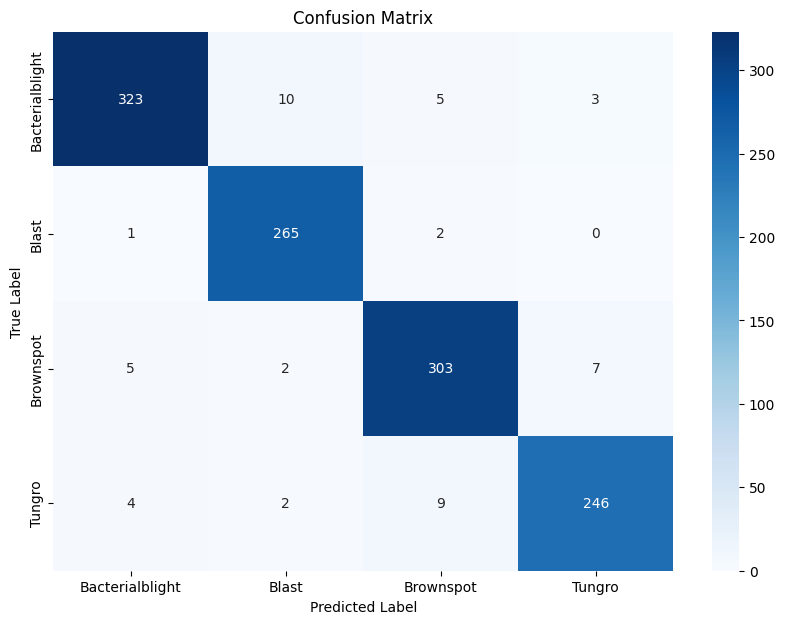

In [13]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=categories)

# Plot the Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=categories, yticklabels=categories)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

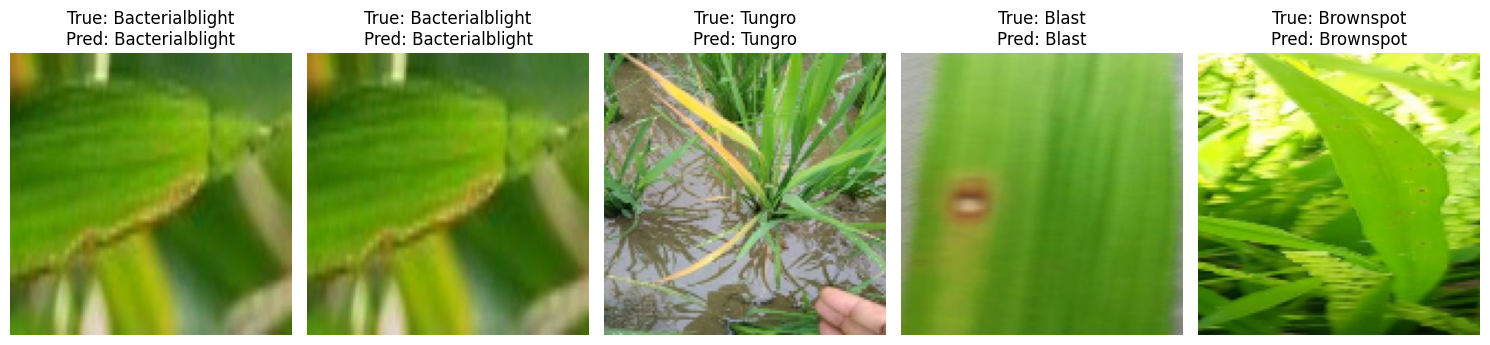

In [8]:
# Optional: Plot some sample test images with their predicted labels
fig, axes = plt.subplots(1, 5, figsize=(15, 8))
for i, ax in enumerate(axes):
    img_path = os.path.join(image_dir, y_test[i], os.listdir(os.path.join(image_dir, y_test[i]))[0])
    img = cv2.imread(img_path)
    img_resized = cv2.resize(img, (128, 128))
    ax.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))
    ax.set_title(f"True: {y_test[i]}\nPred: {y_pred[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

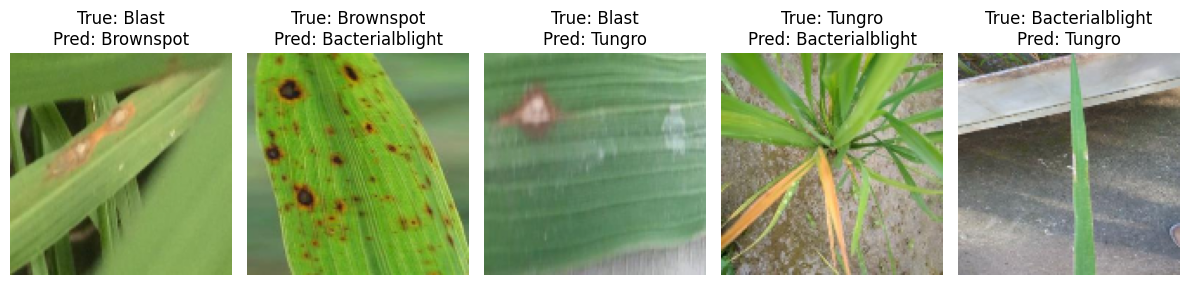

In [27]:
# Display some incorrectly predicted images
incorrect_indices = [i for i, (true, pred) in enumerate(zip(y_test, y_pred)) if true != pred]

# Plotting a subset of incorrect predictions (up to 5 images)
plt.figure(figsize=(12, 8))
for i, idx in enumerate(incorrect_indices[:5]):
    img_path = paths_test[idx]
    true_label = y_test[idx]
    predicted_label = y_pred[idx]

    # Load the original image for display
    img = cv2.imread(img_path)
    img_resized = cv2.resize(img, (128, 128))

    plt.subplot(1, 5, i + 1)
    plt.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))
    plt.title(f"True: {true_label}\nPred: {predicted_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [14]:
# Import necessary libraries
import os
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Set up paths
image_dir = r"C:\Users\Hithaishini\Downloads\Rice Leaf Disease Images"
categories = os.listdir(image_dir)  # Assuming each subfolder represents a disease category

# Initialize data lists
data = []
labels = []
image_paths = []  # Keep track of image paths for visualization

In [16]:
# Load images, extract HOG features, and prepare labels
for category in categories:
    category_path = os.path.join(image_dir, category)
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            # Resize image to a fixed size for consistent feature extraction
            img_resized = cv2.resize(img, (128, 128))

            # Extract HOG features without multichannel argument
            hog_features = hog(img_resized, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False)
            data.append(hog_features)
            labels.append(category)
            image_paths.append(img_path)  # Store the image path

In [17]:
# Convert to numpy arrays for model input
X = np.array(data)
y = np.array(labels)

# Split data into training and test sets
X_train, X_test, y_train, y_test, paths_train, paths_test = train_test_split(X, y, image_paths, test_size=0.2, random_state=42)

In [18]:
# Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [20]:
# Display results
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.953664700926706
Classification Report:
                  precision    recall  f1-score   support

Bacterialblight       0.94      0.96      0.95       341
          Blast       0.98      0.94      0.96       268
      Brownspot       0.96      0.95      0.95       317
         Tungro       0.93      0.97      0.95       261

       accuracy                           0.95      1187
      macro avg       0.95      0.95      0.95      1187
   weighted avg       0.95      0.95      0.95      1187



In [21]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=categories)


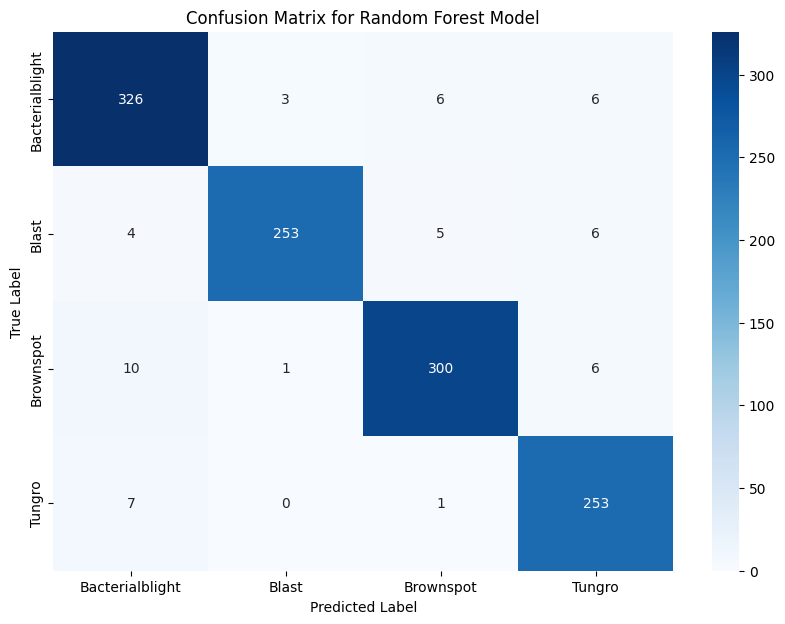

In [22]:
# Plot the Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=categories, yticklabels=categories)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Random Forest Model")
plt.show()

In [23]:
# Display some incorrectly predicted images
incorrect_indices = [i for i, (true, pred) in enumerate(zip(y_test, y_pred)) if true != pred]

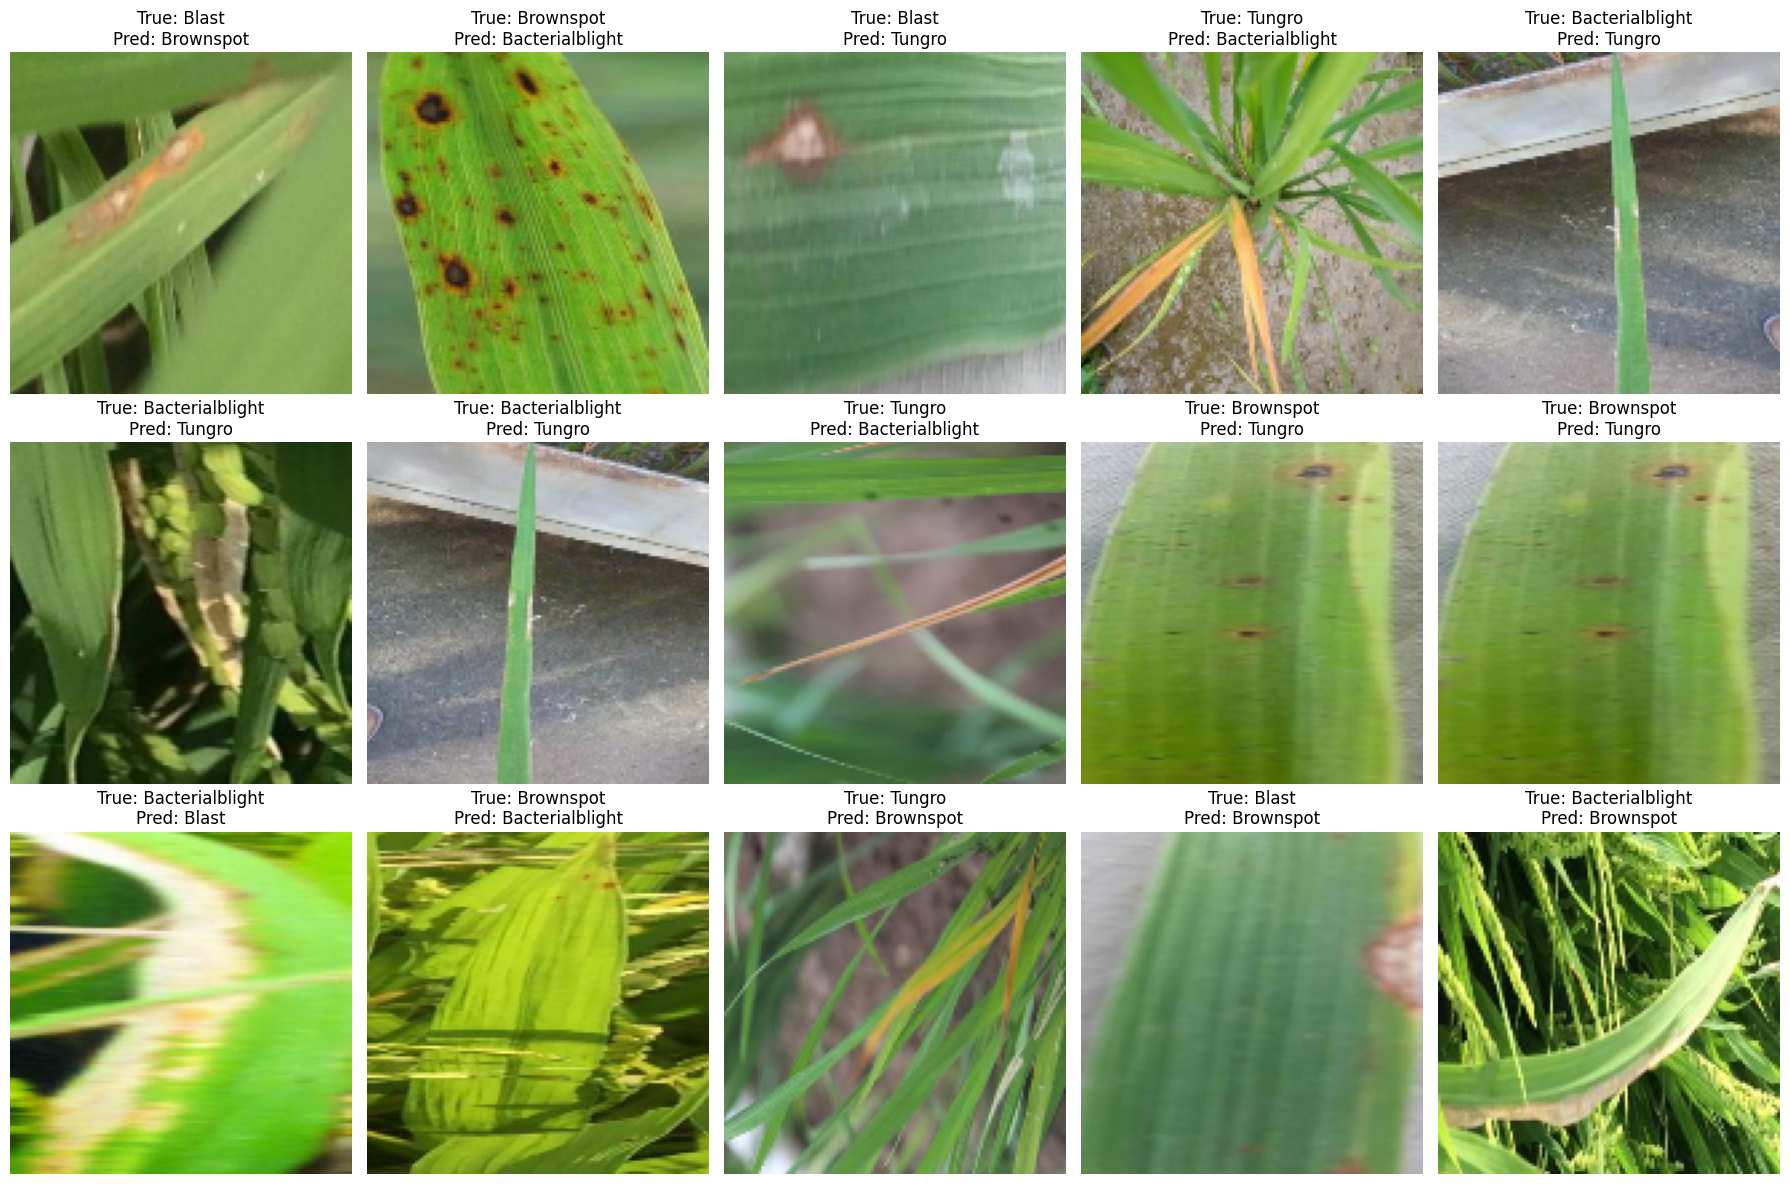

In [28]:
# Display some incorrectly predicted images
incorrect_indices = [i for i, (true, pred) in enumerate(zip(y_test, y_pred)) if true != pred]

# Plotting 15 incorrect predictions
plt.figure(figsize=(18, 12))  # Adjust the figure size to fit 15 images
for i, idx in enumerate(incorrect_indices[:15]):  # Change 5 to 15 to display 15 images
    img_path = paths_test[idx]
    true_label = y_test[idx]
    predicted_label = y_pred[idx]

    # Load the original image for display
    img = cv2.imread(img_path)
    img_resized = cv2.resize(img, (128, 128))

    plt.subplot(3, 5, i + 1)  # 3 rows, 5 columns to display 15 images
    plt.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))
    plt.title(f"True: {true_label}\nPred: {predicted_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()